# Importing necessary python libraries

In [143]:
import pandas_profiling
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

# importing the dataset

In [2]:
dataset = pd.read_csv("diabetes.csv")

In [3]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
dataset.describe()
# summarizes the central tendency, dispersion and shape of a dataset’s distribution

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dataset.isnull().sum()
# check for null values in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### there is no null values in the dataset

# Univariate Analysis

Pregnancies

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

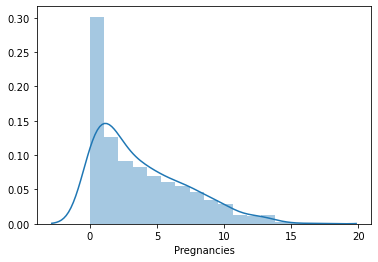

In [9]:
%matplotlib inline
sns.distplot(dataset["Pregnancies"])
dataset["Pregnancies"].describe()

In [10]:
# Pregnancies: Number of times pregnant
# the pregnancy column is right skewed 

Age

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

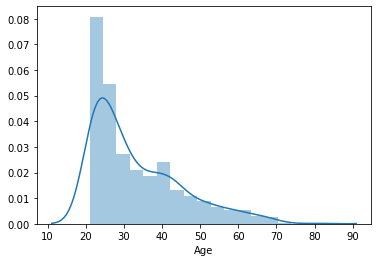

In [11]:
%matplotlib inline
sns.distplot(dataset["Age"])
dataset["Age"].describe()


In [12]:
# Age: Age (years)
# the age column is right skewed 
# the patients are between the age 21 and 81

Glucose

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

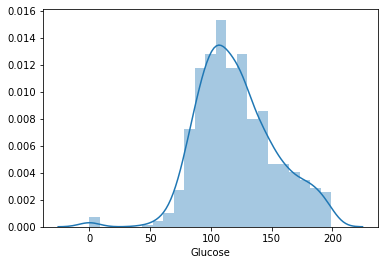

In [13]:
%matplotlib inline
sns.distplot(dataset["Glucose"])
dataset["Glucose"].describe()


In [14]:
# GlucosePlasma glucose concentration a 2 hours in an oral glucose tolerance test
# the data is somewhat normal

SkinThickness

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

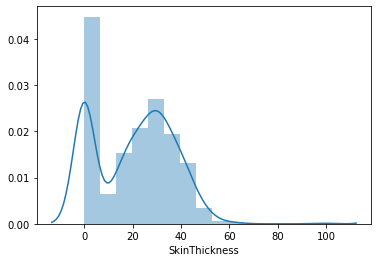

In [15]:
%matplotlib inline
sns.distplot(dataset["SkinThickness"])
dataset["SkinThickness"].describe()

In [16]:
# SkinThickness: Triceps skin fold thickness (mm)
# the distribution is bimodal

Insulin

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

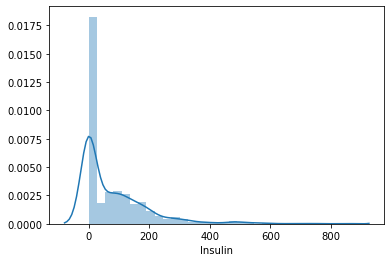

In [17]:
%matplotlib inline
sns.distplot(dataset["Insulin"])
dataset["Insulin"].describe()

In [18]:
# Insulin2-Hour serum insulin (mu U/ml)
# insulin is also right skewed

BMI

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

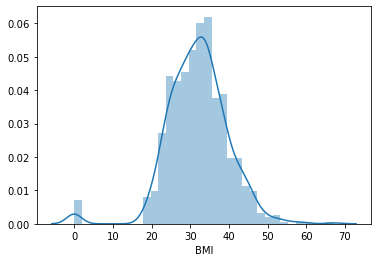

In [19]:
%matplotlib inline
sns.distplot(dataset["BMI"])
dataset["BMI"].describe()

DiabetesPedigreeFunction

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

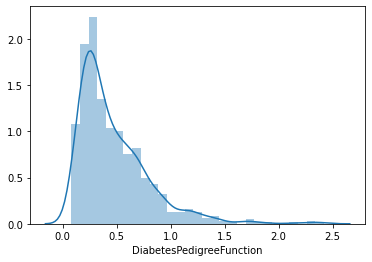

In [20]:
sns.distplot(dataset["DiabetesPedigreeFunction"])
dataset["DiabetesPedigreeFunction"].describe()

Outcome

Outcome
0    500
1    268
Name: Outcome, dtype: int64

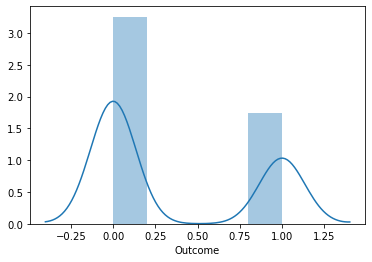

In [21]:
%matplotlib inline

sns.distplot(dataset["Outcome"])
dataset.groupby(["Outcome"])["Outcome"].count()

 the data has 500 patients with no diabetes
 
 the data has 268 patients with diabetes

# bi-variate analysis

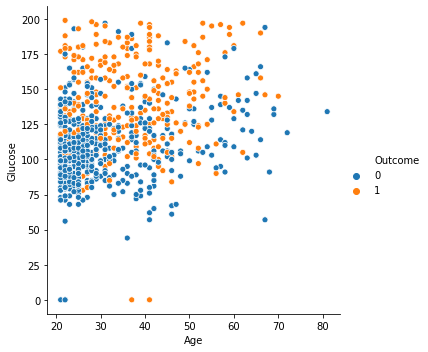

In [22]:
# relationship between Age and glucose
sns.relplot(x="Age", y="Glucose", hue="Outcome", data=dataset);

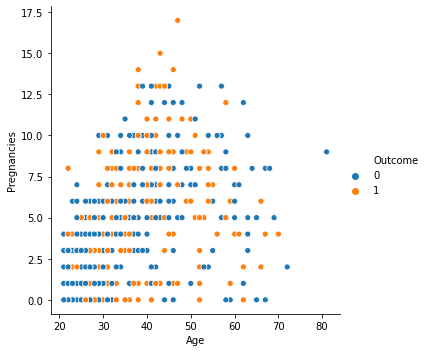

In [23]:
# relationship between Age and Pregnancies
sns.relplot(x="Age", y="Pregnancies", hue="Outcome", data=dataset);

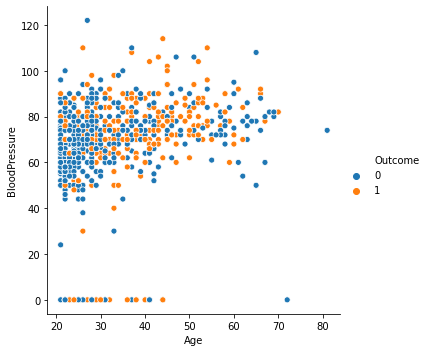

In [24]:
# relationship between Age and BloodPressure

sns.relplot(x="Age", y="BloodPressure", hue="Outcome", data=dataset);

relationship between Age and SkinThickness


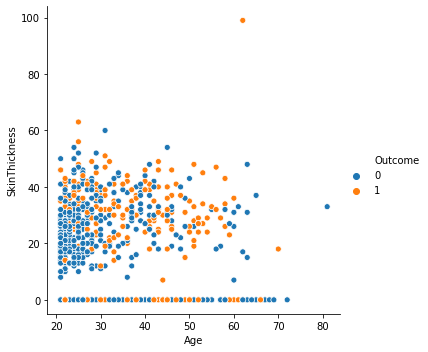

In [25]:
print("relationship between Age and SkinThickness")
sns.relplot(x="Age", y="SkinThickness", hue="Outcome", data=dataset);


relationship between Age and Insulin


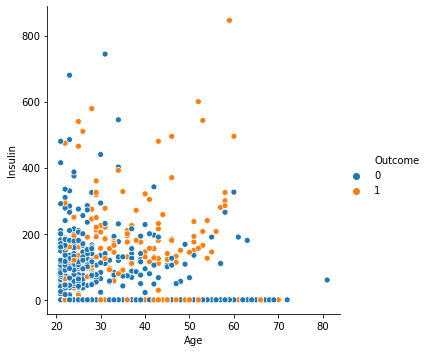

In [26]:
sns.relplot(x="Age", y="Insulin", hue="Outcome", data=dataset);
print("relationship between Age and Insulin")

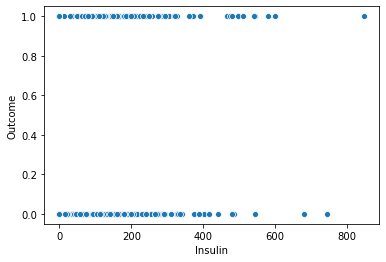

In [27]:
sns.scatterplot(x="Insulin", y="Outcome", data=dataset);

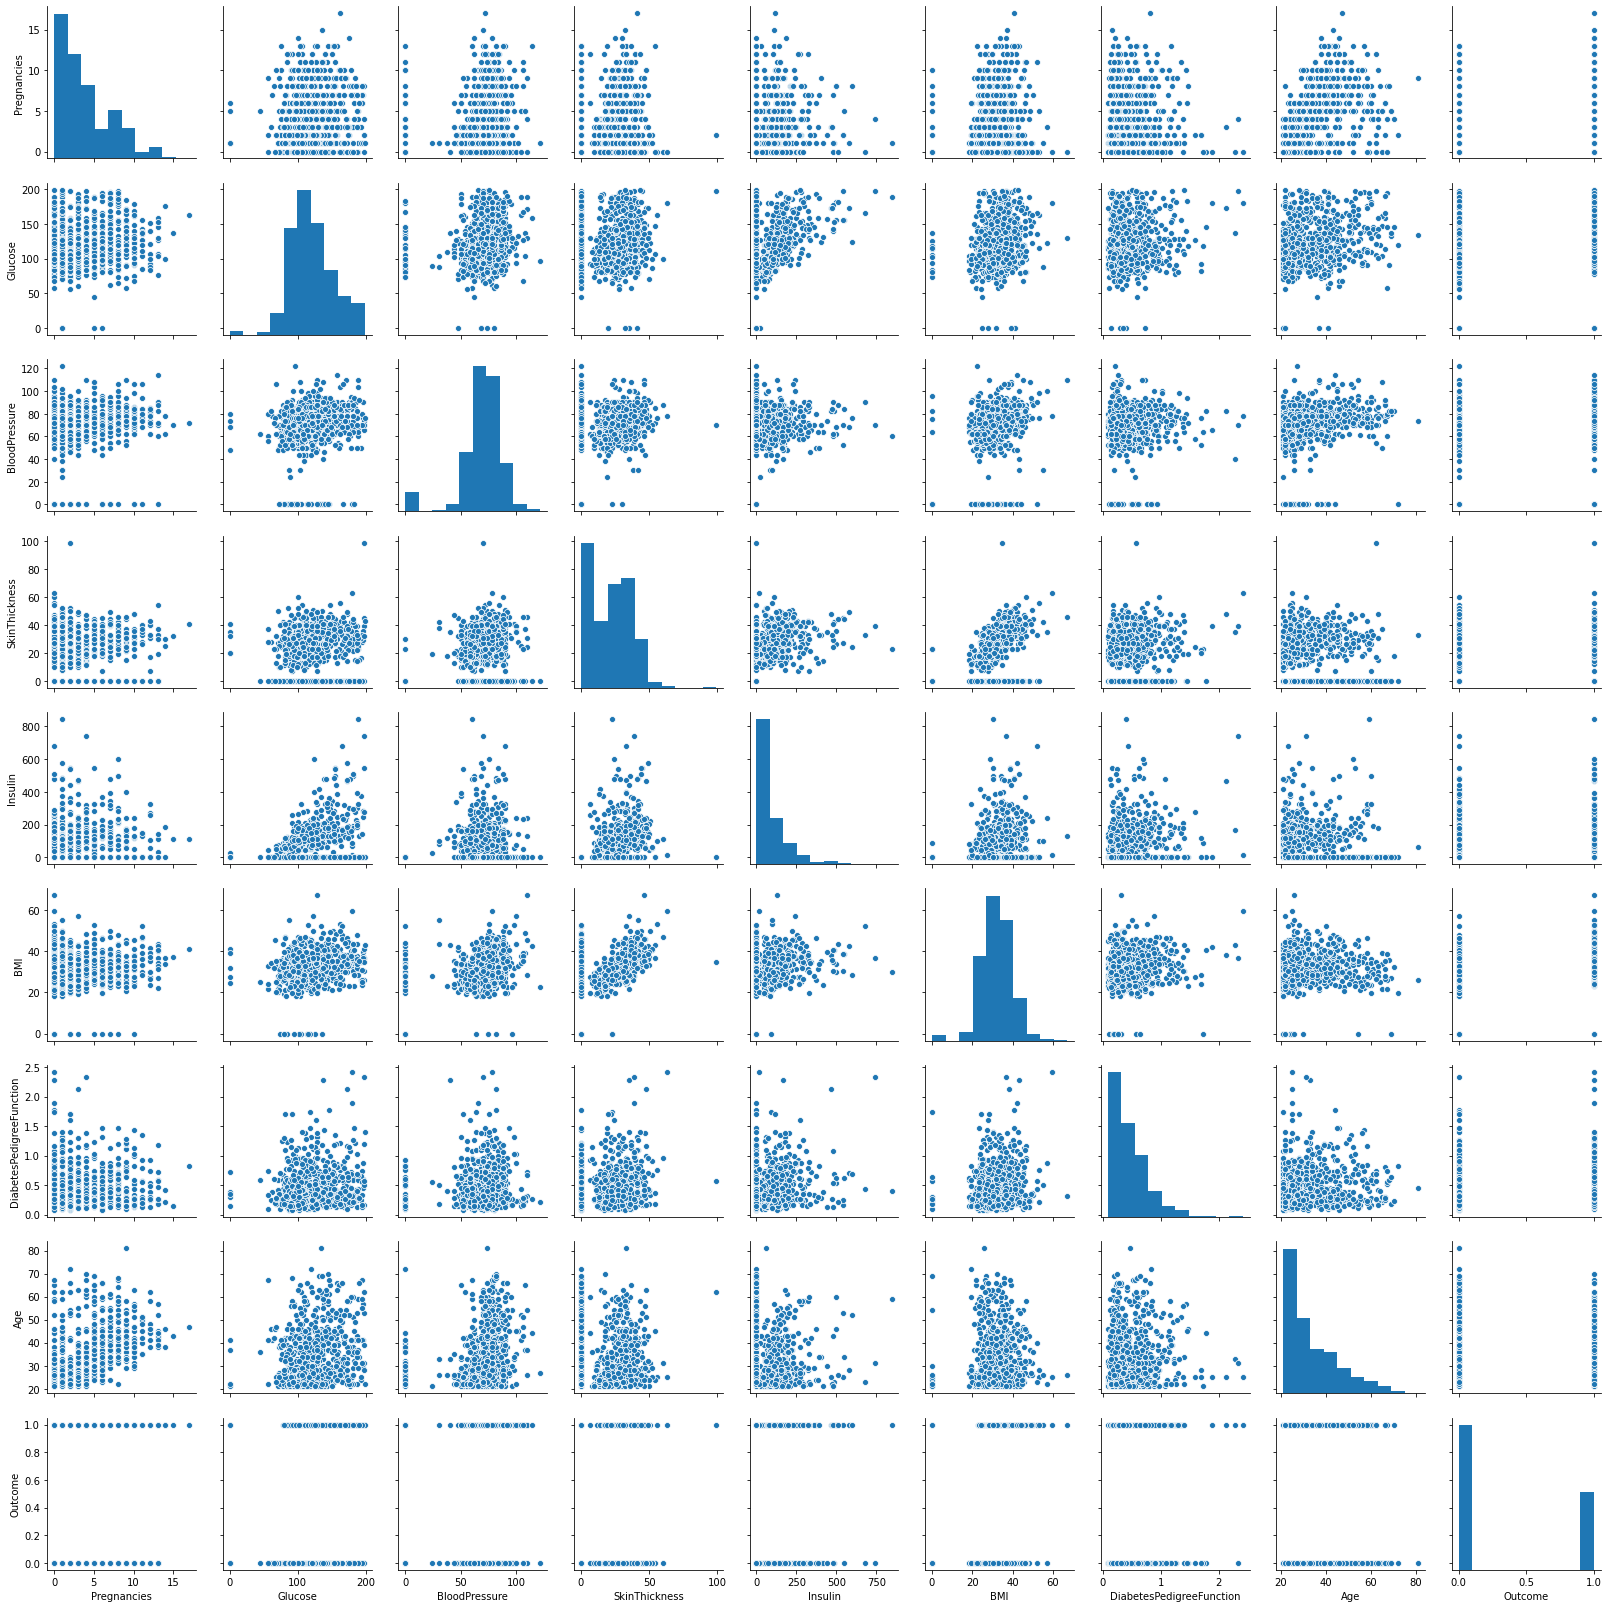

In [28]:
sns.pairplot(dataset)
# pairplot helps in analysing the relationship between two variables

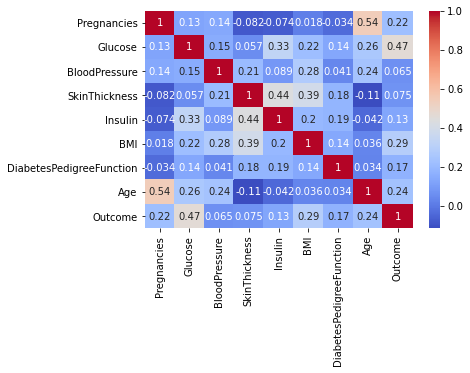

In [29]:
sns.heatmap(dataset.corr(),annot = True,cmap='coolwarm')
# correlation plot between variables

In [30]:
# a quick step to use pandas profiling to get insights 
pandas_profiling.ProfileReport(dataset)

# pandas profiling provide insights regarding all the variables and their distribution 

C:\Users\msg2s\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,9
Number of observations,768
Total Missing (%),0.0%
Total size in memory,54.1 KiB
Average record size in memory,72.2 B
Numeric,8
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [9]:
sm = SMOTE(random_state=42)

### Splitting Data between test and train datasets

In [152]:

X = dataset.drop(["Outcome"],axis = 1).values
y = dataset["Outcome"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

### Logistic Regression

In [153]:
pipe = Pipeline(steps=[('sampling', SMOTE()),
                            ('sc', StandardScaler()),
                           ('logistic',LogisticRegression())])

In [154]:
# list of values of the regularization parameter
C = np.logspace(0, 4, 50)
# list of options for the regularization penalty
penalty = ['l1', 'l2']

parameters = dict(logistic__C=C,
                      logistic__penalty=penalty)

In [155]:
clf_lr = GridSearchCV(pipe, parameters, cv = 5)

In [156]:
clf_lr.fit(X_train, y_train)

C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\

C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\

C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\

C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\

C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\

C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\

C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\

C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\

C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\

C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\msg2s\Anaconda3\lib\site-packages\

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sampling',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                     

In [157]:
y_pred = clf_lr.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("roc_auc_score:",roc_auc_score(y_test, y_pred))

Accuracy: 0.7229437229437229
Precision: 0.5544554455445545
Recall: 0.7466666666666667
roc_auc_score: 0.729102564102564


In [151]:
clf_lr

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
            

In [88]:
clf_lr.best_params_  # get the best parameters of the model

{'logistic__C': 20.235896477251565, 'logistic__penalty': 'l2'}

In [89]:
clf_lr.best_estimator_  # get the best estimators of the model

Pipeline(memory=None,
         steps=[('sampling',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=None,
                       sampling_strategy='auto')),
                ('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logistic',
                 LogisticRegression(C=20.235896477251565, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='lbfgs',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

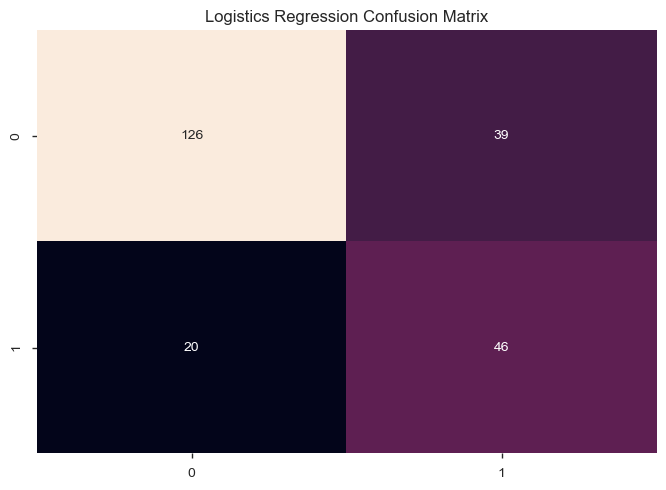

In [90]:
plt.title("Logistics Regression Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, clf_lr.predict(X_test)),annot=True,fmt="d",cbar=False)

### Support Vector Machine

In [91]:
pipeline = Pipeline([
    ('sampling', SMOTE()),
    ('scaler', StandardScaler()),
    ('clf', SVC())
])
parameters = {
    'scaler__with_mean': [True, False],
    'clf__kernel': ['linear', 'rbf'],
    'clf__C':[0.001,0.01,0.1,1, 10],
    'clf__gamma':[0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
}

clf_svc = GridSearchCV(pipeline, param_grid=parameters,cv=3)

In [92]:
clf_svc.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sampling',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='...
     

In [93]:
clf_svc.best_params_ # get the best parameters of the model

{'clf__C': 10,
 'clf__gamma': 3,
 'clf__kernel': 'linear',
 'scaler__with_mean': False}

In [94]:
clf_svc.best_estimator_# get the best estimators of the model

Pipeline(memory=None,
         steps=[('sampling',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=None,
                       sampling_strategy='auto')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('clf',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=3, kernel='linear', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

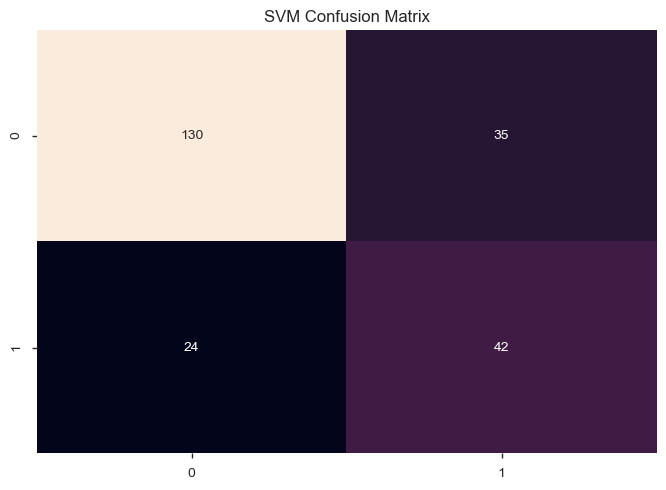

In [95]:
plt.title("SVM Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, clf_svc.predict(X_test)),annot=True,fmt="d",cbar=False)

In [96]:
y_pred = clf_svc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("roc_auc_score:",roc_auc_score(y_test, y_pred))

Accuracy: 0.7445887445887446
Precision: 0.5454545454545454
Recall: 0.6363636363636364
roc_auc_score: 0.712121212121212


### Random Forest

In [107]:
rf = RandomForestClassifier(random_state=88)
grid = {'class__n_estimators': [10, 30, 100, 200, 300, 500],
        'class__max_features': ['auto', 'sqrt', 'log2'],
        'class__max_depth' : [4,5,6,7,8],
        "class__min_samples_leaf": [1, 10, 25, 50],
        'class__criterion' :['gini', 'entropy']}
pipeline = Pipeline([('sampling', SMOTE()), ('class', RandomForestClassifier())])
grid_cv = GridSearchCV(pipeline, grid, scoring = 'roc_auc', cv = 5)
   
grid_cv.fit(X_train, y_train)
grid_cv.best_score_

0.8354004368401894

In [108]:
grid_cv.best_params_

{'class__criterion': 'entropy',
 'class__max_depth': 4,
 'class__max_features': 'auto',
 'class__min_samples_leaf': 1,
 'class__n_estimators': 30}

In [109]:
grid_cv.best_estimator_

Pipeline(memory=None,
         steps=[('sampling',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=None,
                       sampling_strategy='auto')),
                ('class',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=4, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=30, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))

In [110]:
y_pred = grid_cv.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("roc_auc_score:",roc_auc_score(y_test, y_pred))

Accuracy: 0.7575757575757576
Precision: 0.5555555555555556
Recall: 0.7575757575757576
roc_auc_score: 0.7575757575757576


In [111]:
grid_cv

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sampling',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('class',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                      

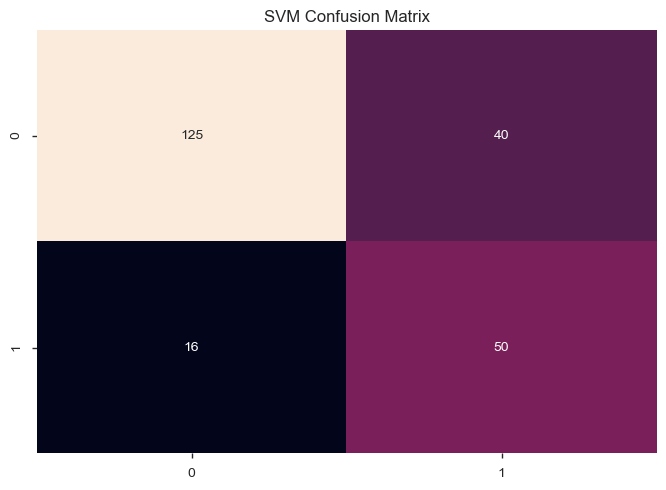

In [113]:
plt.title("SVM Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, grid_cv.predict(X_test)),annot=True,fmt="d",cbar=False)

### Light GBM

Light GBM is a gradient boosting framework that uses tree based learning algorithm.

In [124]:
X_train, y_train = sm.fit_sample(X_train, y_train)
d_train = lgb.Dataset(X_train, label= y_train)
d_test = lgb.Dataset(X_test, label= y_test)

In [99]:
params = {}
params['learning_rate']= 0.003
params['boosting_type']='gbdt'
params['objective']='binary'
params['metric']='binary_logloss'
params['sub_feature']=0.5
params['num_leaves']= 10
params['min_data']=50
params['max_depth']=10

In [125]:

gbm = lgb.train(params,
                    d_train,
                    num_boost_round=10000,
                    valid_sets=d_test,
                    early_stopping_rounds=100)
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
compute_metrics(y_pred, y_test, 0.5)

[1]	valid_0's binary_logloss: 0.692548
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.691727
[3]	valid_0's binary_logloss: 0.691135
[4]	valid_0's binary_logloss: 0.690322
[5]	valid_0's binary_logloss: 0.689737
[6]	valid_0's binary_logloss: 0.688933
[7]	valid_0's binary_logloss: 0.688355
[8]	valid_0's binary_logloss: 0.687559
[9]	valid_0's binary_logloss: 0.686988
[10]	valid_0's binary_logloss: 0.686199
[11]	valid_0's binary_logloss: 0.685635
[12]	valid_0's binary_logloss: 0.68488
[13]	valid_0's binary_logloss: 0.684322
[14]	valid_0's binary_logloss: 0.683574
[15]	valid_0's binary_logloss: 0.683023
[16]	valid_0's binary_logloss: 0.682283
[17]	valid_0's binary_logloss: 0.681738
[18]	valid_0's binary_logloss: 0.681005
[19]	valid_0's binary_logloss: 0.680472
[20]	valid_0's binary_logloss: 0.679746
[21]	valid_0's binary_logloss: 0.679214
[22]	valid_0's binary_logloss: 0.678496
[23]	valid_0's binary_logloss: 0.677975
[24]	valid_0's binary_loglos

[402]	valid_0's binary_logloss: 0.549173
[403]	valid_0's binary_logloss: 0.549069
[404]	valid_0's binary_logloss: 0.54883
[405]	valid_0's binary_logloss: 0.548752
[406]	valid_0's binary_logloss: 0.548591
[407]	valid_0's binary_logloss: 0.548522
[408]	valid_0's binary_logloss: 0.548319
[409]	valid_0's binary_logloss: 0.548218
[410]	valid_0's binary_logloss: 0.547983
[411]	valid_0's binary_logloss: 0.547894
[412]	valid_0's binary_logloss: 0.547673
[413]	valid_0's binary_logloss: 0.5476
[414]	valid_0's binary_logloss: 0.547444
[415]	valid_0's binary_logloss: 0.547346
[416]	valid_0's binary_logloss: 0.547158
[417]	valid_0's binary_logloss: 0.547095
[418]	valid_0's binary_logloss: 0.546899
[419]	valid_0's binary_logloss: 0.546815
[420]	valid_0's binary_logloss: 0.546586
[421]	valid_0's binary_logloss: 0.546495
[422]	valid_0's binary_logloss: 0.546288
[423]	valid_0's binary_logloss: 0.546195
[424]	valid_0's binary_logloss: 0.546046
[425]	valid_0's binary_logloss: 0.545963
[426]	valid_0's bin

[802]	valid_0's binary_logloss: 0.51992
[803]	valid_0's binary_logloss: 0.519915
[804]	valid_0's binary_logloss: 0.519872
[805]	valid_0's binary_logloss: 0.519891
[806]	valid_0's binary_logloss: 0.519851
[807]	valid_0's binary_logloss: 0.519821
[808]	valid_0's binary_logloss: 0.519779
[809]	valid_0's binary_logloss: 0.519775
[810]	valid_0's binary_logloss: 0.519715
[811]	valid_0's binary_logloss: 0.519715
[812]	valid_0's binary_logloss: 0.519717
[813]	valid_0's binary_logloss: 0.519694
[814]	valid_0's binary_logloss: 0.519653
[815]	valid_0's binary_logloss: 0.519644
[816]	valid_0's binary_logloss: 0.519604
[817]	valid_0's binary_logloss: 0.519595
[818]	valid_0's binary_logloss: 0.519599
[819]	valid_0's binary_logloss: 0.519577
[820]	valid_0's binary_logloss: 0.519537
[821]	valid_0's binary_logloss: 0.519529
[822]	valid_0's binary_logloss: 0.51949
[823]	valid_0's binary_logloss: 0.519512
[824]	valid_0's binary_logloss: 0.519473
[825]	valid_0's binary_logloss: 0.519472
[826]	valid_0's bi

NameError: name 'compute_metrics' is not defined

In [130]:
model = lgb.LGBMClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}
gs = GridSearchCV(
    estimator=model,
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    scoring="recall",
    verbose=2
)

In [158]:
X_train, y_train = sm.fit_sample(X_train, y_train)
fitted_model = gs.fit(X_train, y_train)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

In [136]:
print(fitted_model.best_score_)
print(fitted_model.best_params_)

0.8114285714285714
{'colsample_bytree': 0.7, 'max_depth': 15, 'min_split_gain': 0.4, 'n_estimators': 400, 'num_leaves': 50, 'reg_alpha': 1.1, 'reg_lambda': 1.2, 'subsample': 0.7, 'subsample_freq': 20}


In [144]:
binary_pred = np.array([1 if pred > threshold else 0 for pred in y_pred])
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('AUC Score: ', auc(fpr, tpr))
print('AUC ROC Score: ', roc_auc_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, binary_pred))
print('Accuracy Score: ', accuracy_score(y_test, binary_pred))
print('Precision Score: ', precision_score(y_test, binary_pred))
print('Recall Score: ', recall_score(y_test, binary_pred))
print('tn, fp, fn, tp: ', confusion_matrix(y_test, binary_pred).ravel())
print(sns.heatmap(confusion_matrix(y_test, binary_pred), annot=True, 
                  xticklabels=['Pred 0', 'Pred 1'], 
                  yticklabels=['Actual 0', 'Actual 1']));

AUC Score:  0.8009053497942387
AUC ROC Score:  0.8009053497942387
F1 Score:  0.631578947368421
Accuracy Score:  0.696969696969697
Precision Score:  0.5504587155963303
Recall Score:  0.7407407407407407
tn, fp, fn, tp:  [101  49  21  60]
AxesSubplot(0.125,0.11;0.62x0.77)


### Auto ML


In [90]:
import h2o
from h2o.automl import H2OAutoML

In [88]:
df = h2o.import_file("diabetes.csv")
#Define x and y columns
x = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age' ]
y='Outcome'


# Convert y column into factors
df[y] = df[y].asfactor()

# Split data into training and validation
train, valid = df.split_frame(ratios = [.8], seed = 1234)


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [92]:
aml = H2OAutoML(max_models = 10, max_runtime_secs=999999999)
aml.train(x=x, y=y, training_frame = train, validation_frame = valid)

# Review AutoML result
lb = aml.leaderboard
lb

AutoML progress: |█
01:56:51.154: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
01:56:51.171: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_20200506_015651,0.829476,0.486136,0.70964,0.248761,0.397072,0.157666
StackedEnsemble_BestOfFamily_AutoML_20200506_015651,0.828004,0.488864,0.694396,0.250372,0.400568,0.160454
StackedEnsemble_AllModels_AutoML_20200506_015651,0.827381,0.489645,0.694115,0.248004,0.400918,0.160735
GBM_grid__1_AutoML_20200506_015651_model_1,0.818351,0.496827,0.678919,0.251001,0.406288,0.16507
GBM_3_AutoML_20200506_015651,0.815627,0.506198,0.692174,0.254509,0.410496,0.168507
XRT_1_AutoML_20200506_015651,0.815563,0.500014,0.694136,0.25981,0.405443,0.164384
GBM_5_AutoML_20200506_015651,0.813219,0.501447,0.661156,0.245764,0.408633,0.166981
DRF_1_AutoML_20200506_015651,0.805067,0.608173,0.677852,0.268299,0.41111,0.169012
GBM_2_AutoML_20200506_015651,0.804811,0.517333,0.671458,0.270796,0.414405,0.171732
GBM_4_AutoML_20200506_015651,0.802326,0.520644,0.684473,0.271773,0.414536,0.17184


In [93]:
aml.leader

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_20200506_015651


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 0.006739 ),"nlambda = 30, lambda.max = 22.174, lambda.min = 0.006739, lambda.1...",8,8,40,automl_training_py_9_sid_b150




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.15254139629838415
RMSE: 0.3905654827277804
LogLoss: 0.47122612955493354
Null degrees of freedom: 612
Residual degrees of freedom: 604
Null deviance: 796.7599047076832
Residual deviance: 577.7232348343485
AIC: 595.7232348343485
AUC: 0.8415665875343294
AUCPR: 0.7341295938872366
Gini: 0.6831331750686589

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3395007639264338: 


,,0,1,Error,Rate
0,0,304.0,92.0,0.2323,(92.0/396.0)
1,1,51.0,166.0,0.235,(51.0/217.0)
2,Total,355.0,258.0,0.2333,(143.0/613.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.339501,0.698947,200.0
1,max f2,0.146659,0.806575,307.0
2,max f0point5,0.668517,0.714286,88.0
3,max accuracy,0.491975,0.787928,139.0
4,max precision,0.991006,1.000000,0.0
5,max recall,0.018527,1.000000,392.0
6,max specificity,0.991006,1.000000,0.0
7,max absolute_mcc,0.491975,0.521548,139.0
8,max min_per_class_accuracy,0.339501,0.764977,200.0
9,max mean_per_class_accuracy,0.339501,0.766327,200.0



Gains/Lift Table: Avg response rate: 35.40 %, avg score: 35.40 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011419,0.952715,2.421330,2.421330,0.857143,0.961945,0.857143,0.961945,0.027650,0.027650,142.132982,142.132982
1,,2,0.021207,0.918444,1.883257,2.172988,0.666667,0.931458,0.769231,0.947874,0.018433,0.046083,88.325653,117.298830
2,,3,0.030995,0.896917,2.354071,2.230172,0.833333,0.905197,0.789474,0.934397,0.023041,0.069124,135.407066,123.017220
3,,4,0.040783,0.879923,2.824885,2.372903,1.000000,0.890412,0.840000,0.923840,0.027650,0.096774,182.488479,137.290323
4,,5,0.050571,0.856862,2.354071,2.369258,0.833333,0.865240,0.838710,0.912498,0.023041,0.119816,135.407066,136.925821
5,,6,0.101142,0.778431,2.551509,2.460384,0.903226,0.818341,0.870968,0.865420,0.129032,0.248848,155.150884,146.038353
6,,7,0.150082,0.705486,2.259908,2.395011,0.800000,0.734149,0.847826,0.822614,0.110599,0.359447,125.990783,139.501102
7,,8,0.200653,0.630151,2.004757,2.296654,0.709677,0.671094,0.813008,0.784426,0.101382,0.460829,100.475695,129.665430
8,,9,0.300163,0.463563,1.481907,2.026548,0.524590,0.554172,0.717391,0.708092,0.147465,0.608295,48.190678,102.654779
9,,10,0.399674,0.351921,1.250359,1.833293,0.442623,0.404292,0.648980,0.632452,0.124424,0.732719,25.035884,83.329258




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.15606063652187074
RMSE: 0.39504510694586603
LogLoss: 0.47660124694294276
Null degrees of freedom: 154
Residual degrees of freedom: 146
Null deviance: 196.80944413816724
Residual deviance: 147.74638655231223
AIC: 165.74638655231223
AUC: 0.8220211161387632
AUCPR: 0.7159738628478501
Gini: 0.6440422322775263

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30260167054411785: 


,,0,1,Error,Rate
0,0,80.0,24.0,0.2308,(24.0/104.0)
1,1,12.0,39.0,0.2353,(12.0/51.0)
2,Total,92.0,63.0,0.2323,(36.0/155.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.302602,0.684211,62.0
1,max f2,0.188361,0.793919,91.0
2,max f0point5,0.592401,0.701754,29.0
3,max accuracy,0.592401,0.787097,29.0
4,max precision,0.939594,1.000000,0.0
5,max recall,0.028409,1.000000,150.0
6,max specificity,0.939594,1.000000,0.0
7,max absolute_mcc,0.302602,0.510772,62.0
8,max min_per_class_accuracy,0.302602,0.764706,62.0
9,max mean_per_class_accuracy,0.302602,0.766968,62.0



Gains/Lift Table: Avg response rate: 32.90 %, avg score: 32.72 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.012903,0.926302,3.039216,3.039216,1.000000,0.939026,1.000000,0.939026,0.039216,0.039216,203.921569,203.921569
1,,2,0.025806,0.879141,3.039216,3.039216,1.000000,0.897698,1.000000,0.918362,0.039216,0.078431,203.921569,203.921569
2,,3,0.032258,0.874122,3.039216,3.039216,1.000000,0.875588,1.000000,0.909807,0.019608,0.098039,203.921569,203.921569
3,,4,0.045161,0.867565,3.039216,3.039216,1.000000,0.871247,1.000000,0.898790,0.039216,0.137255,203.921569,203.921569
4,,5,0.051613,0.836512,0.000000,2.659314,0.000000,0.858616,0.875000,0.893768,0.000000,0.137255,-100.000000,165.931373
5,,6,0.103226,0.757800,2.279412,2.469363,0.750000,0.801504,0.812500,0.847636,0.117647,0.254902,127.941176,146.936275
6,,7,0.154839,0.663744,2.279412,2.406046,0.750000,0.711698,0.791667,0.802323,0.117647,0.372549,127.941176,140.604575
7,,8,0.200000,0.571519,2.170868,2.352941,0.714286,0.615809,0.774194,0.760207,0.098039,0.470588,117.086835,135.294118
8,,9,0.303226,0.418850,1.139706,1.939925,0.375000,0.491430,0.638298,0.668708,0.117647,0.588235,13.970588,93.992491
9,,10,0.400000,0.304692,1.620915,1.862745,0.533333,0.364714,0.612903,0.595161,0.156863,0.745098,62.091503,86.274510




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.15766600640831632
RMSE: 0.3970717899930897
LogLoss: 0.4861360627144442
Null degrees of freedom: 612
Residual degrees of freedom: 604
Null deviance: 798.615971602926
Residual deviance: 596.0028128879086
AIC: 614.0028128879086
AUC: 0.8294756318949867
AUCPR: 0.709639791616049
Gini: 0.6589512637899735

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3426899162829749: 


,,0,1,Error,Rate
0,0,303.0,93.0,0.2348,(93.0/396.0)
1,1,57.0,160.0,0.2627,(57.0/217.0)
2,Total,360.0,253.0,0.2447,(150.0/613.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.342690,0.680851,194.0
1,max f2,0.157438,0.800616,301.0
2,max f0point5,0.571983,0.719557,114.0
3,max accuracy,0.571983,0.784666,114.0
4,max precision,0.983842,1.000000,0.0
5,max recall,0.016248,1.000000,394.0
6,max specificity,0.983842,1.000000,0.0
7,max absolute_mcc,0.564687,0.511030,116.0
8,max min_per_class_accuracy,0.332183,0.750000,199.0
9,max mean_per_class_accuracy,0.342690,0.751239,194.0



Gains/Lift Table: Avg response rate: 35.40 %, avg score: 35.54 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011419,0.947560,2.421330,2.421330,0.857143,0.965150,0.857143,0.965150,0.027650,0.027650,142.132982,142.132982
1,,2,0.021207,0.917504,1.883257,2.172988,0.666667,0.931791,0.769231,0.949754,0.018433,0.046083,88.325653,117.298830
2,,3,0.030995,0.894439,2.354071,2.230172,0.833333,0.907578,0.789474,0.936435,0.023041,0.069124,135.407066,123.017220
3,,4,0.040783,0.875442,2.354071,2.259908,0.833333,0.888963,0.800000,0.925042,0.023041,0.092166,135.407066,125.990783
4,,5,0.050571,0.855107,1.883257,2.187008,0.666667,0.863525,0.774194,0.913135,0.018433,0.110599,88.325653,118.700758
5,,6,0.101142,0.774020,2.642634,2.414821,0.935484,0.812837,0.854839,0.862986,0.133641,0.244240,164.263416,141.482087
6,,7,0.150082,0.698473,2.071582,2.302895,0.733333,0.734588,0.815217,0.821117,0.101382,0.345622,107.158218,130.289521
7,,8,0.200653,0.634604,2.187008,2.273688,0.774194,0.667686,0.804878,0.782448,0.110599,0.456221,118.700758,127.368776
8,,9,0.300163,0.486582,1.528216,2.026548,0.540984,0.558226,0.717391,0.708113,0.152074,0.608295,52.821636,102.654779
9,,10,0.399674,0.351024,1.111430,1.798702,0.393443,0.412341,0.636735,0.634472,0.110599,0.718894,11.143008,79.870215




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.7781021,0.050761286,0.8130081,0.796748,0.7479675,0.8278689,0.704918
1,auc,0.8330635,0.013754127,0.8246753,0.81990796,0.82767123,0.8543233,0.8387396
2,aucpr,0.7242218,0.060475547,0.7878592,0.6805916,0.78969145,0.70067245,0.6622944
3,err,0.2218979,0.050761286,0.18699187,0.20325203,0.25203252,0.17213115,0.29508197
4,err_count,27.2,6.180615,23.0,25.0,31.0,21.0,36.0
5,f0point5,0.6896112,0.07306892,0.7673267,0.7112069,0.6802721,0.7178218,0.5714286
6,f1,0.7152502,0.027611407,0.7294118,0.72527474,0.7207207,0.73417723,0.6666667
7,f2,0.7505113,0.038356654,0.6950673,0.7399103,0.7662835,0.7512953,0.8
8,lift_top_group,2.5740743,0.72782296,2.673913,1.3977273,2.46,3.2105262,3.128205
9,logloss,0.48439607,0.028449895,0.48711303,0.5164034,0.5004621,0.44086546,0.47713637



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
0,,2020-05-06 01:56:51,0.000 sec,2,.22E2,9,1.290507,1.260910,1.295409,0.021280
1,,2020-05-06 01:56:51,0.002 sec,4,.14E2,9,1.285095,1.255751,1.291147,0.021198
2,,2020-05-06 01:56:51,0.004 sec,6,.86E1,9,1.276738,1.247781,1.284518,0.021072
3,,2020-05-06 01:56:51,0.006 sec,8,.53E1,9,1.264142,1.235765,1.274399,0.020877
4,,2020-05-06 01:56:51,0.008 sec,10,.33E1,9,1.245810,1.218270,1.259418,0.020593
5,,2020-05-06 01:56:51,0.010 sec,12,.2E1,9,1.220460,1.194075,1.238185,0.020197
6,,2020-05-06 01:56:51,0.013 sec,14,.13E1,9,1.187761,1.162876,1.209889,0.019691
7,,2020-05-06 01:56:51,0.016 sec,16,.79E0,9,1.149014,1.126010,1.175045,0.019145
8,,2020-05-06 01:56:51,0.017 sec,18,.49E0,9,1.107219,1.086561,1.135911,0.018696
9,,2020-05-06 01:56:51,0.020 sec,20,.3E0,9,1.066204,1.048503,1.096031,0.018526



See the whole table with table.as_data_frame()


In [94]:

# Consusion matrix on validation set
aml.leader.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30260167054411785: 


,,0,1,Error,Rate
0,0,80.0,24.0,0.2308,(24.0/104.0)
1,1,12.0,39.0,0.2353,(12.0/51.0)
2,Total,92.0,63.0,0.2323,(36.0/155.0)


In [95]:

# precision and recall
confusion_mat_automl = np.array([(25,7),(0,30)])

precision = confusion_mat_automl[0,0]/(confusion_mat_automl[0,0]+confusion_mat_automl[1,0])
print('precision : ', precision )

recall = confusion_mat_automl[1,1]/(confusion_mat_automl[1,1]+confusion_mat_automl[0,1])
print('recall : ', recall)

precision :  1.0
recall :  0.8108108108108109


In [161]:
aml.leader.auc()

0.8415665875343294

# Evaluation Metrics

####  Objective:  Classify the person as Diabetic or Non Diabetic

|  |  |               TRUE  |  |
|:----------------:|:----------------------:|:---------------:|:-----------------------:|
|  |  | <span style="color:brown">HAS DIABETES | <span style="color:brown">DOES NOT HAVE DIABETES  |
| PREDICTED  |<span style="color:blue"> HAS DIABETES |<span style="color:green">TRUE POSITIVES  |<span style="color:red"> FALSE POSITIVES (TYPE : I) |
|  |<span style="color:blue"> DOES NOT HAVE DIABETES |<span style="color:red"> FALSE NEGATIVES (TYPE : II)|<span style="color:green"> TRUE NEGATIVES |

### TYPE I ERROR
#### The model falsely predict the person who do not have diabetes and incorrectly predicted by the algorithm as Positive

### TYPE II ERROR
#### The model falsely predict the person who do has diabetes and incorrectly predicted by the algorithm as Negative


The type II error is more serious as the person who has diabetes gets misidentified as non-diabetic. 
This can lead to possible complications. 
Failure to diagnose diabetes for a patient will pose life danger to the patient, and miss the medical cure time interval

The type I error is less serious than type II error as with further test the patient can be detected as non-diabetic

### Metric Choosen:
### " Recall " -  as we want to lower the False Negative or Type II error 

True Positive : patients that had diabetes and were correctly predicted by the algorithm

True Negative : patients that did not have diabetes and were correctly predicted by the algorithm

False Positives : patients that do not have diabetes and incorrectly predicted by the algorithm as Positive

False Negative : patients that has diabetes and incorrectly predicted by the algorithm as Negative

#### Accuracy  = True Positives + True Negatives /  Total Examples 

#### Precision  = True Positive / True Positives + False Positives

#### Recall  = True Positive / True Positives + False Negative    

#### F1 Score  = 2 * ( Precision * Recall  /  Precision + Recall )    


## Result and Model Comparison

| SCORE | PRECISION | RECALL | AUC-ROC SCORE |
|:-------------------:|:---------:|:------:|:-------------:|
| LOGISTIC REGRESSION | 0.61  | 0.63 | 0.70 |
| SVM | 0.712 | 0.618 | 0.747 |
| RANDOM FOREST | 0.74 |0.736  | 0.80 |
| LightGBM | 0.55 | 0.74 | 0.80 |
| AUTOML | <span style="color:green"> 1.0 |  <span style="color:green">0.810  |<span style="color:green"> 0.841 |

 We can see that the best model is the AutoML as compared to Lightgbm, random forest, SVM and logistic regression.

 Based on the business objective here, we evaluated that the "Recall" is very important as compared to accuracy or precision. AutoML gave us a recall score of 0.810
